### Etsy

In [4]:
from collections.abc import MutableMapping
import json
import csv
import os 
import pandas as pd

def _write_to_csv(csv_file, files):
    headers = ['Name', 'URL', 'SKU', 'Description', 'Category', 
               'Brand','Rating Value', 'Review Count', 'Price', 'Price Currency', 
               'Availability', 'Material', 'Review', 'Rate', 'Reviewer', 'Review Date']
    
    # Write headers to the CSV file
    for f in files:
        with open(f, 'r', encoding = 'utf-8') as file:
            f = json.load(file)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)
                for product in f:
                    # For each product, we extract required data, handle missing values with `.get()` method
                    url = product.get('url', '')
                    name = product.get('name', '')
                    sku = product.get('sku', '')
                    description = product.get('description', '').replace('\n', ' ')
                    category = product.get('category', '')
                    
                    brand = product.get('brand', {}).get('name', '')
                    
                    rating_value = product.get('aggregateRating', {}).get('ratingValue', '')
                    total_review_count = product.get('aggregateRating', {}).get('reviewCount', '')

                    price = product.get('offers', {}).get('price', '')
                    price_currency = product.get('offers', {}).get('priceCurrency', '')
                    availability = product.get('offers', {}).get('availability', '')
                    
                    material = product.get('material', '')
                    
                    # Handling the first review data
                    if 'review' in product and len(product['review']) > 0:
                        for item in product['review']:
                            review = item.get('reviewBody', '')
                            rate = item.get('reviewRating', {}).get('ratingValue', '') 
                            reviewer = item.get('author', {}).get('name', '') 
                            review_date = item.get('datePublished', '')
                            writer.writerow([name, url, sku, description, category, 
                            brand, rating_value, total_review_count, price, price_currency, 
                            availability, material, review, rate, reviewer, review_date])
                    else:
                        review = rate = reviewer = review_date = ''
                        writer.writerow([name, url, sku, description, category, 
                        brand, rating_value, total_review_count, price, price_currency, 
                        availability, material, review, rate, reviewer, review_date])
                    
                    # Write the row for each product


    print(f'Data has been successfully written to {csv_file}')

%pwd

'C:\\Users\\tianc\\scrapfly-scrapers\\etsy-scraper\\results'

In [1]:
%cd ~/scrapfly-scrapers/etsy-scraper/results/

# csv_file = 'etsy_reviews_.csv'

# files = ['products_null.json']
# _write_to_csv(csv_file, files)


C:\Users\tianc\scrapfly-scrapers\etsy-scraper\results


In [ ]:
file = pd.read_csv('etsy_reviews_w_sentiment.csv')
# file = file.dropna(subset = 'Review')
# file.to_excel('etsy_r.xlsx')
# file

##### sent with vader

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = file.dropna(subset = 'Review').drop_duplicates().reset_index(drop = True)

analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['Review']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('etsy_reviews_w_sentiment.csv', index = False)
file.to_excel('etsy_reviews_w_sentiment.xlsx', index = False)

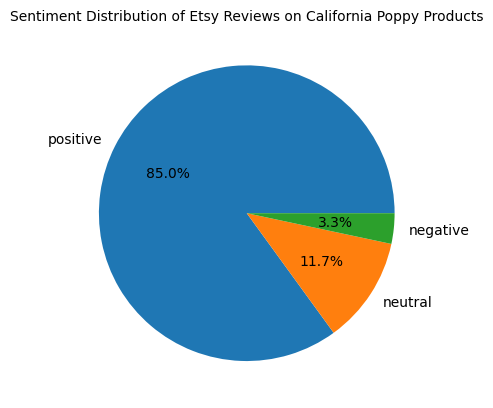

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.pred.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of Etsy Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_etsy_transformer.png', dpi = 300)

### TrustPilot

In [1]:
from collections.abc import MutableMapping
import json
import csv
import os 
import pandas as pd

def _write_to_csv(csv_file, files):
    headers = ['Company', 'Website', 'Id', 'Source',
               'Trust Score (if from TrustPilot)', 'Review Count', 'Review Source','Title', 'Rate', 'Review', 'Likes', 'Reply', 'Reviewer', 'Review Date', 'Total Reviews by Reviewer', 
               'Language', 'Country Code']
    
    # Write headers to the CSV file
    for i in range(0, len(files), 2):
        company = files[i]
        reviews = files[i+1]
        with open(company, 'r', encoding = 'utf-8') as f1, open(reviews, 'r', encoding = 'utf-8') as f2:    
            company = json.load(f1)[0]
            reviews = json.load(f2)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)
                Company =  company.get('companyDetails', {}).get('displayName', '')
                Website = company.get('companyDetails', {}).get('websiteUrl', '')
                Id = company.get('companyDetails', {}).get('id', '')
                Source = company.get('pageUrl', '')
                Trust_Score = company.get('companyDetails', {}).get('trustScore', '')
                Review_Count = company.get('companyDetails', {}).get('numberOfReviews', '')
                for r in reviews:
                    ReviewSource = r.get('labels', {}).get('verification', {}).get('reviewSourceName', '')
                    Title = r.get('title', '')
                    Rate = r.get('rating', '')
                    Review = r.get('text', '')
                    Likes = r.get('likes', '')
                    Reply = r.get('reply', '')
                    Reviewer = r.get('consumer', {}).get('displayName', '') or r.get('consumer', {}).get('id', '')
                    ReviewDate = r.get('dates', {}).get('publishedDate', '')
                    TotalReviewsbyReviewer = r.get('consumer', {}).get('numberOfReviews', '')
                    Language = r.get('language', '')   
                    CountryCode = r.get('consumer', {}).get('countryCode', '') 
                    writer.writerow([Company, Website, Id, Source, Trust_Score, Review_Count, ReviewSource, 
                                            Title, Rate, Review, Likes, Reply, Reviewer, ReviewDate, TotalReviewsbyReviewer, 
                                            Language, CountryCode])
                    
    print(f'Data has been successfully written to {csv_file}')


In [4]:
%cd  ~/scrapfly-scrapers/trustpilot-scraper/results/

csv_file = 'trustpilot_reviews.csv'
files = ['companies.json','reviews.json',
        'companies_0.json', 'reviews_0.json']


_write_to_csv(csv_file, files)

C:\Users\tianc\scrapfly-scrapers\trustpilot-scraper\results
Data has been successfully written to trustpilot_reviews.csv


In [5]:
file = pd.read_csv('trustpilot_reviews_.csv')
file.head()
# file = file.dropna(subset = 'Review')
# file.to_excel('trustpilot_reviews.xlsx')


,Company,Website,Id,Source,Trust Score (if from TrustPilot),Review Count,Review Source,Title,Rate,Review,Likes,Reply,Reviewer,Review Date,Total Reviews by Reviewer,Language,Country Code
0,Foster Farms,http://fosterfarms.com,64332c1c26e69b18a5e193bb,https://www.trustpilot.com/review/fosterfarms.com,3.7,2,Organic,I love your Foster Farms Jalapeno Cheese Corn ...,5,"So cheesy, and so spicy! They make your mouth ...",0,NaN,Alec Heesacker,2024-04-05T23:55:51.000Z,48,en,US
1,Foster Farms,http://fosterfarms.com,64332c1c26e69b18a5e193bb,https://www.trustpilot.com/review/fosterfarms.com,3.7,2,Organic,Great chicken breasts,2,"Great chicken breasts, great product created b...",0,NaN,Malvina,2023-04-09T23:30:04.000Z,7,en,US
2,Mountain Rose Herbs,http://www.mountainroseherbs.com,56e33ba20000ff00058a1440,https://www.trustpilot.com/review/www.mountain...,4.8,11085,BigCommerce,Top quality,5,"Top quality, good service, accurate orders",0,NaN,customer,2024-09-26T17:11:53.000Z,4,en,US
3,Mountain Rose Herbs,http://www.mountainroseherbs.com,56e33ba20000ff00058a1440,https://www.trustpilot.com/review/www.mountain...,4.8,11085,BigCommerce,Great Products Everytime!,5,I'm never disappointed with what I received fr...,0,NaN,Star,2024-09-26T16:10:16.000Z,1,en,US
4,Mountain Rose Herbs,http://www.mountainroseherbs.com,56e33ba20000ff00058a1440,https://www.trustpilot.com/review/www.mountain...,4.8,11085,BigCommerce,It takes too long to ship my order,3,It takes too long to ship my order! several d...,0,NaN,JILL BRASHEAR,2024-09-26T02:41:40.000Z,3,en,US


In [16]:
url = 'https://www.amazon.com/Pacific-Herbs-Menopause-Relief-Herb/product-reviews/B00CXXTIVE/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
ASIN = url.split("/product-reviews/")[1].split("/")[0]
url.split(f'{ASIN}')

['https://www.amazon.com/Pacific-Herbs-Menopause-Relief-Herb/product-reviews/',
 '/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews']

In [ ]:
total_pages = 10
_reviews_per_page = 20
for page in range(2, total_pages + 1):
    url = f"https://www.amazon.com/Pacific-Herbs-Menopause-Relief-Herb/product-reviews/{ASIN}/ref=cm_cr_getr_d_paging_btm_next_{page}?pageNumber={page}&pageSize={_reviews_per_page}"
    print(url)

### Amazon

In [1]:
from collections.abc import MutableMapping
import json
import csv
import os
import pandas as pd

def _write_to_csv(csv_file, files):
    # Updated headers to match the data order
    # headers = [
    #     'asin', 'brand', 'name', 'description', 'features', 'stars', 
    #     'rating_count', 'review_title', 'review_rating', 
    #     'review_location_and_date', 'verified', 'review_body', 'images'
    # ]
    headers = [
        'asin', 'name', 'ingredients'
    ]

    # Write headers to the CSV file
    for f in files:
        with open(f, 'r', encoding='utf-8') as file:
            f = json.load(file)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                
                # Write headers only if the file is empty
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)

                for product in f:
                    asin = product.get('asin', '')
                    # brand = product.get('brand', '')
                    name = product.get('name', '')
                    # description = product.get('description', '')
                    # features = ' | '.join(product.get('features', []))  # Join features into a single string
                    # stars = product.get('stars', '')  # Extract stars
                    # rating_count = product.get('rating_count', '')  # Extract rating count
                    
                    # # Handling the review information
                    # review_title = product.get('title', '')
                    # review_rating = product.get('rating', '')
                    # review_date = product.get('location_and_date', '')
                    # verified = product.get('verified', '')
                    # review_text = product.get('text', '')

                    # extract ingredients for quality analysis
                    ingredients = product.get('ingredients', '') 
                    
                    # Join image URLs into a single string
                    # images = ' | '.join(product.get('images', []))

                    # Write row to CSV, with order matching the headers|
                    # writer.writerow([asin, brand, name, description, features, stars, 
                    #                  rating_count, review_title, review_rating,
                    #                  review_date, verified, review_text, image|s])
                    writer.writerow([asin, name, ingredients])

    print(f'Data has been successfully written to {csv_file}')


In [10]:
%cd  ~/scrapfly-scrapers/amazon-scraper/results/

# csv_file = 'Amazon_reviews_california_poppy_products.csv'

# files = ['search_california_poppy_drink_products.json']
# _write_to_csv(csv_file, files)


C:\Users\tianc\scrapfly-scrapers\amazon-scraper\results


In [11]:
file = pd.read_csv('Amazon_reviews_w_sentiment.csv')
# file = file.drop_duplicates(subset = 'asin').reset_index(drop = True)
file.head()
# file = file[file.brand == 'Pacific Herbs']
# file.to_excel('Amazon_reviews.xlsx', index_label='asin')



,asin,brand,name,description,features,stars,rating_count,review_title,review_rating,review_location_and_date,verified,review_body,images,neg,neu,pos,compound,sentiment,pred
0,B0014AY6PA,Amazon's Choice: Overall Pick,Herb Pharm Certified Organic California Poppy ...,Get calming support for the nervous system wit...,Expertly extracted to provide calming support ...,4.1 out of 5 stars,447 global ratings,Great product,tensor(5.),"Reviewed in the United States on May 11, 2024",tensor(True),Works as described. It doesn’t taste bad but y...,https://m.media-amazon.com/images/I/41+Foxie2+...,tensor(0.0430),tensor(0.6510),tensor(0.3060),tensor(0.9407),positive,positive
1,B0014AY6PA,Amazon's Choice: Overall Pick,Herb Pharm Certified Organic California Poppy ...,Get calming support for the nervous system wit...,Expertly extracted to provide calming support ...,4.1 out of 5 stars,447 global ratings,Works great for sleep and mild anxiety,tensor(5.),"Reviewed in the United States on January 14, 2015",tensor(True),I researched California Poppy in regard to anx...,https://m.media-amazon.com/images/I/41+Foxie2+...,tensor(0.0770),tensor(0.7620),tensor(0.1610),tensor(0.9659),positive,neutral
2,B0014AY6PA,Amazon's Choice: Overall Pick,Herb Pharm Certified Organic California Poppy ...,Get calming support for the nervous system wit...,Expertly extracted to provide calming support ...,4.1 out of 5 stars,447 global ratings,"Terrible taste, great sleep, pick and choose!",tensor(3.),"Reviewed in the United States on December 5, 2023",tensor(True),I prefer tinctures made with alcohol as they a...,https://m.media-amazon.com/images/I/41+Foxie2+...,tensor(0.1040),tensor(0.8960),tensor(0.),tensor(-0.8210),negative,negative
3,B0014AY6PA,Amazon's Choice: Overall Pick,Herb Pharm Certified Organic California Poppy ...,Get calming support for the nervous system wit...,Expertly extracted to provide calming support ...,4.1 out of 5 stars,447 global ratings,Effective,tensor(4.),"Reviewed in the United States on April 28, 2017",tensor(True),I have used this as sleep enhancing remedy for...,https://m.media-amazon.com/images/I/41+Foxie2+...,tensor(0.0490),tensor(0.8560),tensor(0.0950),tensor(0.5984),positive,negative
4,B0014AY6PA,Amazon's Choice: Overall Pick,Herb Pharm Certified Organic California Poppy ...,Get calming support for the nervous system wit...,Expertly extracted to provide calming support ...,4.1 out of 5 stars,447 global ratings,Helpful for sleep,tensor(5.),"Reviewed in the United States on June 12, 2023",tensor(True),I’ve been using various Herb Phrm products for...,https://m.media-amazon.com/images/I/41+Foxie2+...,tensor(0.0340),tensor(0.8560),tensor(0.1100),tensor(0.8336),positive,neutral


#### sent with vader

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = file.dropna(subset = 'review_body').drop_duplicates().reset_index(drop = True)

analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['review_body']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('Amazon_reviews_w_sentiment.csv', mode='a', index=False, header=False)
# file.to_excel('Amazon_reviews_w_sentiment.xlsx', index = False)

In [3]:
file = pd.read_csv('Amazon_reviews_w_sentiment.csv')
file = file.drop_duplicates().reset_index(drop = True)
file.to_csv('Amazon_reviews_w_sentiment.csv', index = False)
file.to_excel('Amazon_reviews_w_sentiment.xlsx', index = False)

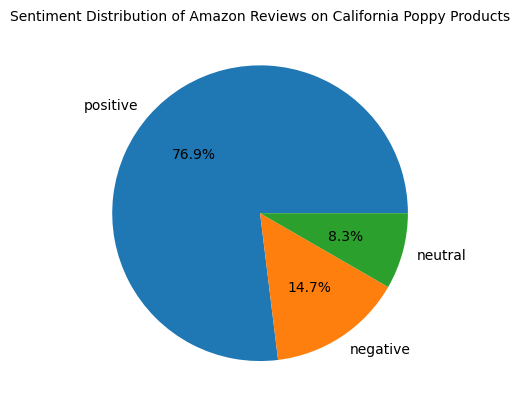

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of Amazon Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_Amazon_vader.png', dpi = 300)

#### sent w/ Transformers

In [3]:
from transformers import AutoTokenizer
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
from transformers import AutoModelForSequenceClassification
from datasets import Dataset, load_dataset
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import evaluate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import text_cleaning
import random
import pandas as pd
from collections import Counter
import pickle
import joblib
import csv
import json
from copy import deepcopy 
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

violet = '#702b9d'
RANDOM_SEED = 3001
batch_size = 8
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def tokenize_function(examples):
    tok = tokenizer(examples["text"], padding='max_length', truncation=True, 
                    max_length = 512,
                    return_tensors="pt")
    examples['text'] = tok['input_ids']
    return examples 

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [4]:
%cd ../../amazon-scraper/

/scratch/tl2546/scrapfly-scrapers/amazon-scraper


In [5]:
## preprocess, tokenize, loader
amazon_reviews = Dataset.from_csv('results/Amazon_reviews_w_sentiment.csv')

amazon_reviews_ = amazon_reviews.map(lambda x: text_cleaning.text_cleaning(x, map_label = False))
amazon_reviews_ = amazon_reviews_.map(tokenize_function, batched = True, load_from_cache_file = False)
amazon_reviews_.set_format('torch')

Map:   0%|          | 0/1839 [00:00<?, ? examples/s]

In [14]:
def do_infer(infer_data, output_dir):

    model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")      
    model.to(device)
    model.eval()
    
    headers = list(amazon_reviews_.features)[:-1] + ['pred']
    
    output_file = output_dir + '/preds.csv'    
    with torch.no_grad():
        with open(output_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                writer.writerow(headers)
                for i in tqdm(range(0, len(infer_data), batch_size)):
                    batch = infer_data[i:i + batch_size]
                    input = torch.tensor(batch["text"]).to(device)
                    
                    outputs = model(input)
                    logits = outputs.logits
                    predictions = torch.argmax(logits, dim=-1)
                    
                    for j in range(predictions.shape[0]):
                        row = [batch[h][j] for h in headers[:-1]] + [['negative', 'neutral', 'positive'][predictions[j].item()]]
                        writer.writerow(row)
    print('inference completed ...')
    return 

In [15]:
do_infer(amazon_reviews_, os.getcwd())

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 230/230 [00:18<00:00, 12.29it/s]

inference completed ...


##### effective within 24 hrs

In [4]:
import re
effectiveness_pattern = r'\b(?:immediat\w*|fast\w*|\b\w*hour\w*\b|same day|instant\w*|overnight|rapid\w*|quick\w*|prompt\w*|within\w*\s+\d+\s*hour\w*|same\s+night|one\s+day|short\w*\s+time|quick\s+relief|in\s+no\s+time|in\s+a\s+few\s+hours|next\s+day|first\s+use|immediat\w+\s+result\w*|effective\s+right\s+away|almost\s+instantly)\b'

def extract_effectiveness_keywords(text):
    if pd.isna(text):
        return []
    return re.findall(effectiveness_pattern, text, flags=re.IGNORECASE)


file['effectiveness_keywords_in_review'] = (file.review_title.apply(extract_effectiveness_keywords) +
                                             file.review_body.apply(extract_effectiveness_keywords))
file['effectiveness_mentioned'] = file.effectiveness_keywords_in_review.apply(lambda x: len(x) > 0)

In [ ]:
import plotly.express as px

file_w_effect = file.groupby('asin').agg({'review_body':len, 'effectiveness_mentioned': 'mean'}).reset_index()

fig = px.histogram(file_w_effect, x="effectiveness_mentioned", 
                   histnorm='probability',)

fig.update_layout(
    title_text='Effectiveness Mentioned in Amazon Reviews',
    title_x=0.5,  # Center the title
    bargap=0.1,
    height=400,
    width=800,

)

fig.update_xaxes(title_text='Effectiveness Mentioned',)

fig.show()

fig.write_image('effectiveness_mentioned.png',)

In [11]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import os

user_name, api_key = os.getenv("plotly_name"), os.getenv("plotly_api")
# Replace these with your actual username and API key
chart_studio.tools.set_credentials_file(username= user_name, api_key=api_key)

py.plot(fig, filename='effectiveness_mentioned.html', auto_open=True)

In [5]:
effectiveness_flags = pd.get_dummies(file.effectiveness_keywords_in_review.explode().str.strip(), prefix='', prefix_sep='').groupby(level=0).max()
effectiveness_dict = dict(zip(effectiveness_flags.columns, effectiveness_flags.sum(axis = 0)))

with open('effectiveness_dict.json', 'w') as f:
    json.dump(effectiveness_dict, f, indent = 4)

effectiveness_df = pd.DataFrame(index = effectiveness_dict.keys(), data = effectiveness_dict.values(), columns = ['count']).sort_values('count', ascending = False)

In [15]:
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import os

fig = px.bar(effectiveness_df)

fig.update_layout(
    title_text='Effectiveness Keywords Frequency in Amazon Reviews',
    title_x=0.5,  # Center the title
    bargap=0.1,
    height=400,
    width=800,
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(
            size=10,
        ))

)

fig.update_xaxes(title_text='Effectiveness Keywords',)
fig.update_yaxes(title_text='Frequency')

fig.show()

# fig.write_image('effectiveness_mentioned.png',)



user_name, api_key = os.getenv("plotly_name"), os.getenv("plotly_api")
# Replace these with your actual username and API key
chart_studio.tools.set_credentials_file(username= user_name, api_key=api_key)

py.plot(fig, filename='effectiveness_frequency.html', auto_open=True)

'https://plotly.com/~tl2546/9/'

##### ingredients analysis

In [5]:
file.ingredients = file.ingredients.str.lower()
file.ingredients = file.ingredients.apply(lambda x: str(x).split('(')[0].lstrip() if x else None)

ingredient_flags = pd.get_dummies(file.ingredients.str.split('[,]').explode().str.strip(), prefix='', prefix_sep='').groupby(level=0).max()
file_w_ingredients = pd.concat([file, ingredient_flags], axis = 1).dropna()

to_drop = [i for i in ingredient_flags.columns if 'california poppy' in i or not i]

file_w_ingredients = file_w_ingredients.drop(columns = to_drop)
file_w_ingredients.to_excel('Amazon_reviews_w_ingredients.xlsx', index = False)

In [6]:
file_w_ingredients.head()

,asin,name,ingredients,a base of pure vegetable glycerine and distilled water.,active ingredients: rhodiola rosea extract 500mg other ingredients: veggie capsule,additional ingredients: vegetable stearate,alcohol,and tart cherry fruit,anise seed,ashwagandha 250mg,...,turkey tail 250mg,usp grade vegetable glycerin and purified water,valerian,valerian root,valeriana officinalis,vegetable cellulose,vegetable glycerin,vitamin c,water,whole plant
0,B00K6L4UV8,Organic California Poppy Herb C/S,nan,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,B0BRQT7576,Pure California Poppy Tea - Natural California...,nan,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,B09RWBLB5T,Nelson's Tea - California Poppy - Cut & Sifted...,nan,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,B008668JL2,"Bio Nutrition California Poppy Vegi-Caps, 60 C...","california poppy seed 500 mg **,additional ing...",False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5,B07PTBPL7W,California Poppy Tea Herb Organic 4 Ounce,nan,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
from collections import defaultdict
import json
ingredient_list = ingredient_flags.drop(columns = to_drop).columns
ingredient_dict = defaultdict(list)

for ingredient in ingredient_list:
    ingredient_dict[ingredient] = list(set(file_w_ingredients.groupby(ingredient)['name'].apply(list)[True]))

with open('ingredient_dict.json', 'w') as f:
    json.dump(ingredient_dict, f, indent = 4)


In [29]:
for key in ingredient_dict.keys():
    ingredient_dict[key] = ingredient_dict[key][0]

pd.DataFrame.from_dict(ingredient_dict, orient = 'index', columns=['products']).to_excel('ingredient_dict.xlsx')

##### safety concerns

In [ ]:
import re
import plotly.express as px
import pandas as pd
import json
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import os

# Define the safety-related keyword pattern
safety_pattern = r'\b(?:safe\w*|side\s+effect|concern\w*|allerg\w*)\b'

def extract_safety_keywords(text):
    if pd.isna(text):
        return []
    return re.findall(safety_pattern, text, flags=re.IGNORECASE)

# Extract and process safety keywords
file['safety_keywords_in_review'] = (file.review_title.apply(extract_safety_keywords) +
                                     file.review_body.apply(extract_safety_keywords))
file['safety_mentioned'] = file.safety_keywords_in_review.apply(lambda x: len(x) > 0)

# Group by ASIN and calculate the average mention of safety keywords
file_w_safety = file.groupby('asin').agg({'review_body':len, 'safety_mentioned': 'mean'}).reset_index()

# Plot histogram for safety mentions
fig = px.histogram(file_w_safety, x="safety_mentioned", histnorm='probability')

fig.update_layout(
    title_text='Safety Mentioned in Amazon Reviews',
    title_x=0.5,  # Center the title
    bargap=0.1,
    height=400,
    width=800,
)

fig.update_xaxes(title_text='Safety Mentioned')

fig.show()

fig.write_image('safety_mentioned.png')

# Upload to Plotly
user_name, api_key = os.getenv("plotly_name"), os.getenv("plotly_api")
chart_studio.tools.set_credentials_file(username=user_name, api_key=api_key)

py.plot(fig, filename='safety_mentioned.html', auto_open=True)

# Generate a dictionary of safety keyword frequencies
safety_flags = pd.get_dummies(file.safety_keywords_in_review.explode().str.strip(), prefix='', prefix_sep='').groupby(level=0).max()
safety_dict = dict(zip(safety_flags.columns, safety_flags.sum(axis=0)))

# Save safety keyword frequency as JSON
with open('safety_dict.json', 'w') as f:
    json.dump(safety_dict, f, indent=4)

# Convert dictionary to DataFrame for plotting
safety_df = pd.DataFrame(index=safety_dict.keys(), data=safety_dict.values(), columns=['count']).sort_values('count', ascending=False)

# Plot safety keyword frequency bar chart
fig = px.bar(safety_df)

fig.update_layout(
    title_text='Safety Keywords Frequency in Amazon Reviews',
    title_x=0.5,  # Center the title
    bargap=0.1,
    height=400,
    width=800,
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=10)
    )
)

fig.update_xaxes(title_text='Safety Keywords')
fig.update_yaxes(title_text='Frequency')

fig.show()

# Save to Plotly
py.plot(fig, filename='safety_frequency.html', auto_open=True)


'https://plotly.com/~tl2546/14/'

### Walmart

In [3]:
import json
import json
import csv
import os
import pandas as pd

def _write_to_csv(csv_file, files):
    headers = [
        'product_name', 'sku', 'description', 'brand', 'ingredient','rating_value', 'review_count', 'image_url', 'product_url',
        'customer_name', 'review_date', 'star_rating', 'review_title', 'review_text']

    for f in files:
        with open(f, 'r', encoding = 'utf-8') as file:
            f = json.load(file)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)

                for entry in f:
                    product_info = entry['product']
                    product_name = product_info['name']
                    sku = product_info['sku']
                    description = product_info['description']
                    brand = product_info['brand']['name']
                    ingredient = product_info['ingredient']
                   
                    rating_value = product_info.get('aggregateRating', {}).get('ratingValue', '')
                    review_count = product_info.get('aggregateRating', {}).get('reviewCount','')
                    image_url = product_info['image']
                    product_url = product_info['offers'][0]['url']


                    # Add each review along with the product details
                    for review in entry['product_reviews']:
                        customer_name = review['customer_name']
                        review_date = review['review_date']
                        star_rating = review['star_rating']
                        review_title = review['review_title']
                        review_text = review['review_text']

                        writer.writerow([product_name, sku, description, brand, ingredient, rating_value, review_count, image_url, product_url,
                                            customer_name, review_date, star_rating, review_title, review_text])
                    
    print(f'Data has been successfully written to {csv_file}')


In [14]:
%cd  ~/scrapfly-scrapers/walmart-scraper/results/

# csv_file = 'Walmart_reviews_california_poppy_.csv'

# files = ['Walmart_product_and_reviews_california_poppy_tincture_.json',
#          'Walmart_product_and_reviews_california_poppy_drink_.json',
#          'Walmart_product_and_reviews_california_poppy_tea__.json',
#          'Walmart_product_and_reviews_california_poppy_supplement__.json']
# _write_to_csv(csv_file, files)

C:\Users\tianc\scrapfly-scrapers\walmart-scraper\results


In [15]:
file = pd.read_csv('Walmart_reviews_w_sentiment.csv')
file.head()
# file = file[file.brand == 'Pacific Herbs']
# file.to_excel('Amazon_reviews.xlsx', index_label='asin')



,product_name,sku,description,brand,ingredient,rating_value,review_count,image_url,product_url,customer_name,review_date,star_rating,review_title,review_text,neg,neu,pos,compound,sentiment,pred
0,"Organic Wheat Grass Powder, Sourced from USA, ...",tensor(705154315),Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,tensor(4.6000),tensor(788),https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,iHerb Customer,"Aug 2, 2024",5 out of 5 stars review,Wheat Grass Powder for Well-Being,I recently started taking this wheat grass pow...,tensor(0.),tensor(0.7600),tensor(0.2400),tensor(0.9791),positive,positive
1,"Organic Wheat Grass Powder, Sourced from USA, ...",tensor(705154315),Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,tensor(4.6000),tensor(788),https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,iHerb Customer,"Jul 19, 2024",5 out of 5 stars review,Best superfood!,I been using this brand over a year now I have...,tensor(0.),tensor(0.7680),tensor(0.2320),tensor(0.9299),positive,positive
2,"Organic Wheat Grass Powder, Sourced from USA, ...",tensor(705154315),Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,tensor(4.6000),tensor(788),https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,iHerbCustomer,"Jun 13, 2024",5 out of 5 stars review,A great energy booster,This is my first buy of this brand of organic ...,tensor(0.),tensor(0.6990),tensor(0.3010),tensor(0.9807),positive,positive
3,"Organic Wheat Grass Powder, Sourced from USA, ...",tensor(705154315),Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,tensor(4.6000),tensor(788),https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,iHerb customer,"Sep 7, 2024",5 out of 5 stars review,sub for barley,I originally used to only use wheatgrass but s...,tensor(0.0650),tensor(0.6970),tensor(0.2380),tensor(0.8462),positive,negative
4,"Organic Wheat Grass Powder, Sourced from USA, ...",tensor(705154315),Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,tensor(4.6000),tensor(788),https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,iHerb Customer,"Jul 27, 2024",5 out of 5 stars review,good antioxidant,I add this to my breakfast drink to thicken an...,tensor(0.),tensor(0.8380),tensor(0.1620),tensor(0.6993),positive,positive


##### sent with vader

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = file.dropna(subset = 'review_text').drop_duplicates(subset= ['sku', 'review_title', 'review_text']).reset_index(drop = True)
analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['review_text']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('Walmart_reviews_w_sentiment.csv', mode='a', index=False, header=True)
file.to_excel('Walmart_reviews_w_sentiment.xlsx', index = False)

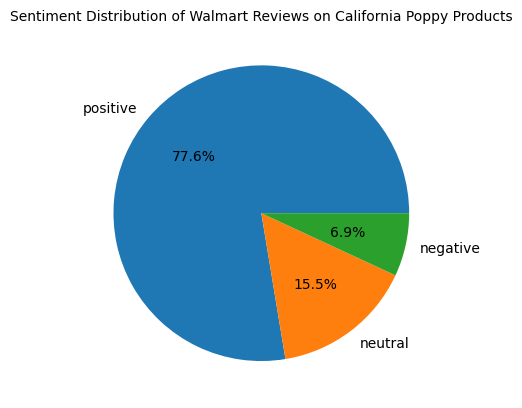

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.pred.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of Walmart Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_Walmart_transformer.png', dpi = 300)

### iherb

In [ ]:
%cd ~/scrapfly-scrapers/iherb-scraper/results/
import pandas as pd

files = []
for kw in ['tea', 'tincture', 'supplement', 'drink']:
    search = pd.read_json(f'search_{kw}_.json')
    product = pd.read_json(f'search_{kw}_products_.json')
    review = pd.read_json(f'search_{kw}_reviews_.json')


    search.url = search.apply(lambda x: x.url if x.url.startswith('https://www.iherb.com') else '/pr/'.join(x.review_url.split('/r/')), axis = 1)

    file = review.merge(search, on = 'review_url').merge(product, on = 'url')
    file.drop(columns = ['rating_value', 'review_count'], inplace = True)

    column_order = [
        'name', 'price', 'sku', 'description', 'direction', 'ingredients', 'warnings', 
        'disclaimer', 'info_table', 'url', 'avg_rating', 'total_reviews', 'review_url', 
        'title', 'rating', 'text', 'location_and_date', 'verified', 'rewarded'
    ]

    file = file[column_order]
    file.drop_duplicates(subset = ['text', 'location_and_date'],)
    files += [file]


C:\Users\tianc\scrapfly-scrapers\iherb-scraper\results


In [4]:
comb_file = pd.concat(files)
comb_file = comb_file.reset_index().drop(columns = 'index')
comb_file.to_csv('iherb_reviews.csv', index = False)
comb_file.to_excel('iherb_reviews.xlsx', index = False)


#### sent with vader

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = comb_file.dropna().drop_duplicates(subset = ['name', 'title', 'text']).reset_index(drop = True)

analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['text']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('iherb_reviews_w_sentiment.csv', mode='a', index=False, header=False)
file.to_excel('iherb_reviews_w_sentiment.xlsx', index = False)

In [ ]:
file = pd.read_csv('iherb_reviews_w_sentiment.csv')
file = file.drop_duplicates(subset = ['name', 'title','text']).reset_index(drop = True)
file.to_csv('iherb_reviews_w_sentiment.csv', index = False)
file.to_excel('iherb_reviews_w_sentiment.xlsx', index = False)

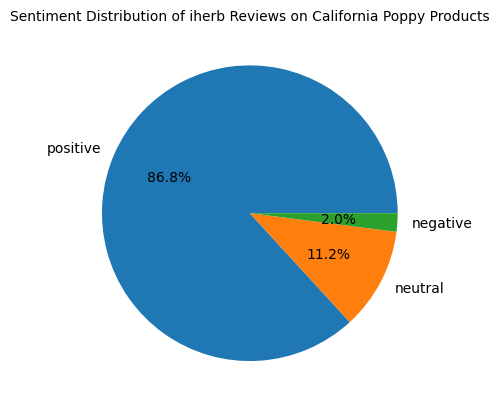

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.pred.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of iherb Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_iherb_transformer.png', dpi = 300)

#### sent w/ Transformer

In [ ]:
from transformers import AutoTokenizer
from transformers import RobertaTokenizer
from transformers import AutoModelForSequenceClassification
from datasets import Dataset, load_dataset
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import evaluate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import text_cleaning
import random
import pandas as pd
from collections import Counter
import pickle
import joblib
import csv
import json
from copy import deepcopy
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

violet = '#702b9d'
RANDOM_SEED = 3001
batch_size = 8
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def tokenize_function(examples):
    tok = tokenizer(examples["review_text"], padding='max_length', truncation=True,
                    max_length = 512,
                    return_tensors="pt")
    examples['text_encoded'] = tok['input_ids']
    return examples

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# preprocess, tokenize, loader
Walmart_reviews = Dataset.from_csv('Walmart_reviews_w_sentiment.csv')

Walmart_reviews_ = Walmart_reviews.map(lambda x: text_cleaning.text_cleaning(x, map_label = False))
Walmart_reviews_ = Walmart_reviews_.map(tokenize_function, batched = True, load_from_cache_file = False)
Walmart_reviews_.set_format('torch')

def do_infer(infer_data, output_dir):

    model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
    model.to(device)
    model.eval()

    headers = list(Walmart_reviews_.features)[:-1] + ['pred']

    output_file = output_dir + '/preds.csv'
    with torch.no_grad():
        with open(output_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                writer.writerow(headers)
                for i in tqdm(range(0, len(infer_data), batch_size)):
                    batch = infer_data[i:i + batch_size]
                    input = torch.tensor(batch["text_encoded"]).to(device)

                    outputs = model(input)
                    logits = outputs.logits
                    predictions = torch.argmax(logits, dim=-1)

                    for j in range(predictions.shape[0]):
                        row = [batch[h][j] for h in headers[:-1]] + [['negative', 'neutral', 'positive'][predictions[j].item()]]
                        writer.writerow(row)
    print('inference completed ...')
    return

do_infer(Walmart_reviews_, os.getcwd())